In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
ds = pd.read_csv('./data/application_train.csv')
ds.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
ds2 = ds

In [131]:
col = 'CNT_CHILDREN'
for index in ds2.columns:
    print(index)
# ds2.groupby(col)[col].count()
# ds2[col].unique()

# ds2['CODE_GENDER'] = ds2['CODE_GENDER'].replace({'XNA': 'F'})
# ds2['CNT_CHILDREN'] = ds2['CNT_CHILDREN'].replace({8: 7, 9: 7, 10: 7, 11: 7, 12: 7, 13: 7, 14: 7, 19: 7})

# AMT_INCOME_BINS = [0, 30000, 100000, 200000, 500000, 1000000, 10000000, 200000000]
# ds2['AMT_IN_RANGE'] = pd.cut(ds2['AMT_INCOME_TOTAL'], bins=AMT_INCOME_BINS)
# ds2.groupby(['AMT_IN_RANGE', 'TARGET'])['TARGET'].count()

# AMT_CRE_BINS = [0, 100000, 150000, 200000, 300000, 400000, 500000, 1000000, 2000000, 10000000]
# ds2['AMT_CREDIT_RANGE'] = pd.cut(ds2['AMT_CREDIT'], bins=AMT_CRE_BINS)
# ds2.groupby(['AMT_CREDIT_RANGE', 'TARGET'])['TARGET'].count()

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (12,) and requested shape (16,)

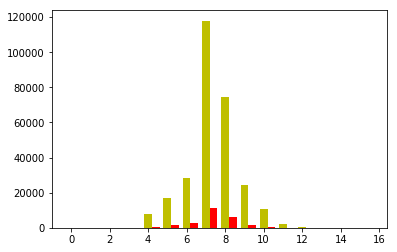

In [93]:
feature_name = 'AMT_IN_RANGE'
not_loan = ds2[ds2['TARGET']==0]
not_loan = not_loan.groupby(feature_name).count()['TARGET']
loan = ds2[ds2['TARGET']==1]
loan = loan.groupby(feature_name).count()['TARGET']
name_list = sorted(ds2[feature_name].unique())

x = list(range(len(not_loan)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, not_loan, width=width, label='not_loan',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, loan, width=width, label='loan',tick_label = name_list,fc = 'r')
plt.legend()
plt.show()